<a href="https://colab.research.google.com/github/demie20/logistic_regression/blob/main/logistic_regession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loss: 0.6101032138557548 	
loss: 0.3164571273419889 	
loss: 0.2194958258652945 	
loss: 0.17320499321271934 	
loss: 0.14607099287856287 	
loss: 0.12815861543322357 	
loss: 0.11539614644446694 	
loss: 0.10580937413397788 	
loss: 0.09832410997287289 	
loss: 0.09230481639365433 	
loss: 0.08735080774785456 	
loss: 0.08319654859365935 	
loss: 0.07965885654559214 	
loss: 0.07660711657949612 	
loss: 0.07394558465529442 	
loss: 0.07160241047709137 	
loss: 0.06952257502655086 	
loss: 0.06766320226584563 	
loss: 0.06599036125310753 	
loss: 0.06447683240746992 	
loss: 0.06310051415343806 	
loss: 0.061843264948607306 	
loss: 0.06069004754950779 	
loss: 0.05962828704460291 	
loss: 0.05864738265136908 	
loss: 0.057738331821157465 	
loss: 0.05689343752344646 	
loss: 0.05610607792626418 	
loss: 0.05537052343369104 	
loss: 0.05468179005611578 	
loss: 0.054035520934801975 	
loss: 0.053427889886078585 	
loss: 0.05285552231600891 	
loss: 0.052315429948360616 	
loss: 0.05180495661980629 	
loss: 0.0513217330

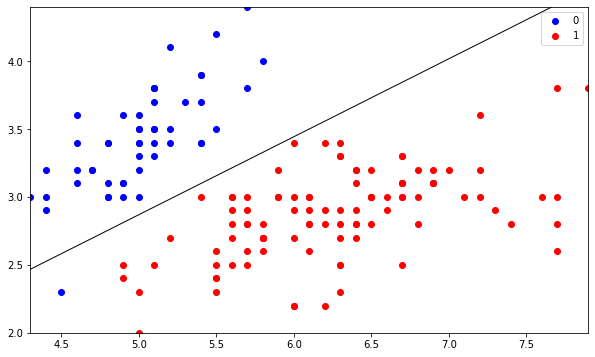

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets



def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))


def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()


def log_likelihood(X, Y, weights):
    scores = np.dot(X, weights)
    return np.sum(Y * scores - np.log(1 + np.exp(scores)))



def logistic_reg(alpha, X, y, max_iterations=70000):
    theta = np.zeros(X.shape[1])

    for iterations in range(max_iterations):
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        gradient = np.dot(X.T, h - y) / y.size
        theta = theta - alpha * gradient  
        z = np.dot(X, theta)
        h = sigmoid_function(z)
        J = cost_function(h, y)
        if iterations % 100 == 0:
            print(f"loss: {J} \t")  
    return theta




if __name__ == "__main__":
    iris = datasets.load_iris()
    X = iris.data[:, :2]
    y = (iris.target != 0) * 1

    alpha = 0.1
    theta = logistic_reg(alpha, X, y, max_iterations=70000)
    print("theta: ", theta)  

    def predict_prob(X):
        return sigmoid_function(
            np.dot(X, theta)
        )  

    plt.figure(figsize=(10, 6))
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="b", label="0")
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="r", label="1")
    (x1_min, x1_max) = (X[:, 0].min(), X[:, 0].max())
    (x2_min, x2_max) = (X[:, 1].min(), X[:, 1].max())
    (xx1, xx2) = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = predict_prob(grid).reshape(xx1.shape)
    plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors="black")

    plt.legend()
    plt.show()